<a href="https://colab.research.google.com/github/Gabrielnkl/notebooks/blob/main/linear_regression_housing_price_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadbinimran/housing-price-prediction-data")

print("Path to dataset files:", path)

100%|██████████| 763k/763k [00:00<00:00, 60.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muhammadbinimran/housing-price-prediction-data/versions/1


In [ ]:
import pandas as pd

df = pd.read_csv(f"{path}/housing_price_dataset.csv")
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
# Turn all categories into numbers
df_one_hot = pd.get_dummies(df).astype(float)
df_one_hot.head() # view the converted columns

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126.0,4.0,1.0,1969.0,215355.283618,1.0,0.0,0.0
1,2459.0,3.0,2.0,1980.0,195014.221626,1.0,0.0,0.0
2,1860.0,2.0,1.0,1970.0,306891.012076,0.0,1.0,0.0
3,2294.0,2.0,1.0,1996.0,206786.787153,0.0,0.0,1.0
4,2130.0,5.0,2.0,2001.0,272436.239065,0.0,1.0,0.0


In [ ]:
# Create X and y values
X = df_one_hot.drop('Price', axis=1)
y = df_one_hot['Price']

In [ ]:
X.head(), y.head()

(   SquareFeet  Bedrooms  Bathrooms  YearBuilt  Neighborhood_Rural  \
 0      2126.0       4.0        1.0     1969.0                 1.0   
 1      2459.0       3.0        2.0     1980.0                 1.0   
 2      1860.0       2.0        1.0     1970.0                 0.0   
 3      2294.0       2.0        1.0     1996.0                 0.0   
 4      2130.0       5.0        2.0     2001.0                 0.0   
 
    Neighborhood_Suburb  Neighborhood_Urban  
 0                  0.0                 0.0  
 1                  0.0                 0.0  
 2                  1.0                 0.0  
 3                  0.0                 1.0  
 4                  1.0                 0.0  ,
 0    215355.283618
 1    195014.221626
 2    306891.012076
 3    206786.787153
 4    272436.239065
 Name: Price, dtype: float64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 5. Normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Set random seed
import tensorflow as tf
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=100)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 92288.8672 - mae: 92288.8672
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 40507.5039 - mae: 40507.5039
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40433.7656 - mae: 40433.7656
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 40435.1211 - mae: 40435.1211
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 40425.6953 - mae: 40425.6953
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40424.5898 - mae: 40424.5898
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40420.3242 - mae: 40420.3242
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 40418.0859 - mae: 40418.0859
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 40413.3789 - mae: 40413.3789
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40405.7969 - mae: 40405.7969


In [ ]:
from sklearn.preprocessing import minmax_scale
X_train_scaled = minmax_scale(X_train)
X_test_scaled = minmax_scale(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None
         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225
50%     2007.000000

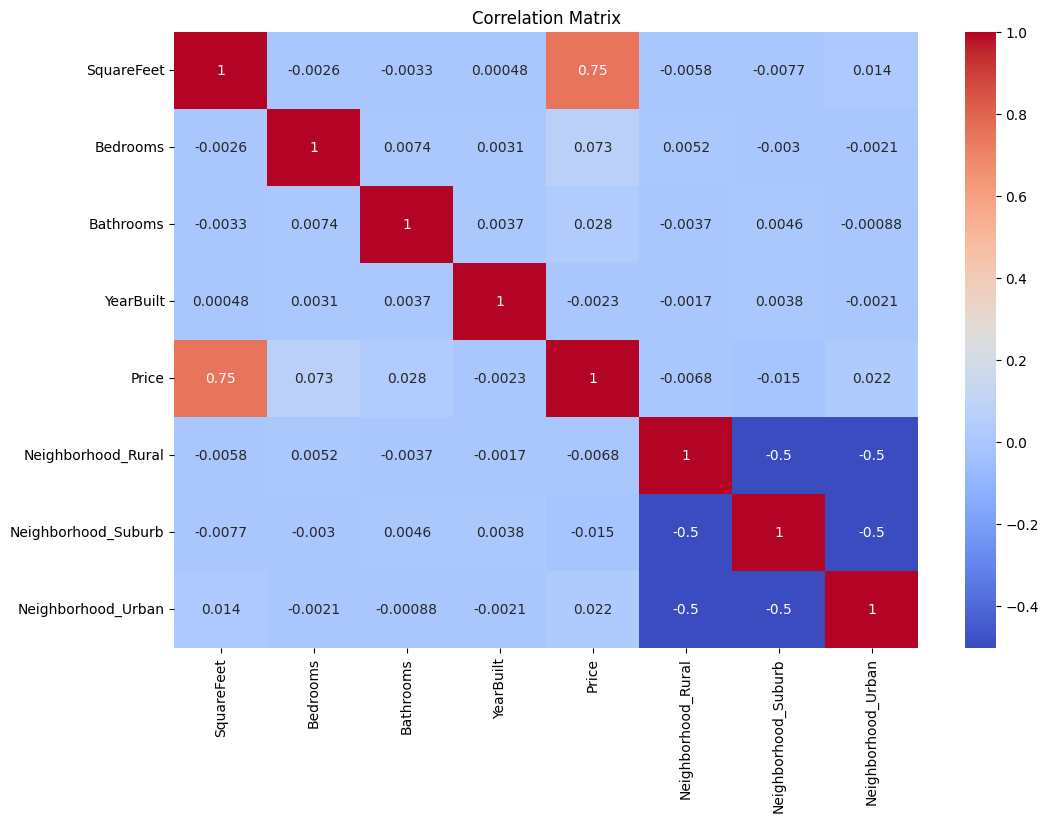

In [ ]:
import seaborn as sns
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_one_hot.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Set random seed
import tensorflow as tf
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, input_shape=(X_train_scaled.shape[1],)),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

history = model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 217606.1094 - mae: 217606.1094
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 78489.5156 - mae: 78489.5156
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 53409.5391 - mae: 53409.5391
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 49332.1094 - mae: 49332.1094
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 45668.5547 - mae: 45668.5547
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 42898.8477 - mae: 42898.8477
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 41277.9727 - mae: 41277.9727
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 40517.4180 - mae: 40517.4180
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40228.3242 - mae: 40228.3242
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 40124.5977 - mae: 40124.5977


In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 39071.5586 - mae: 39071.5586


[39462.8515625, 39462.8515625]

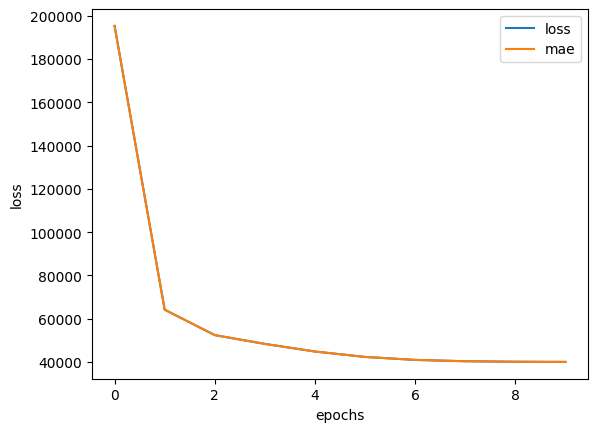

In [ ]:
import matplotlib.pyplot as plt
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


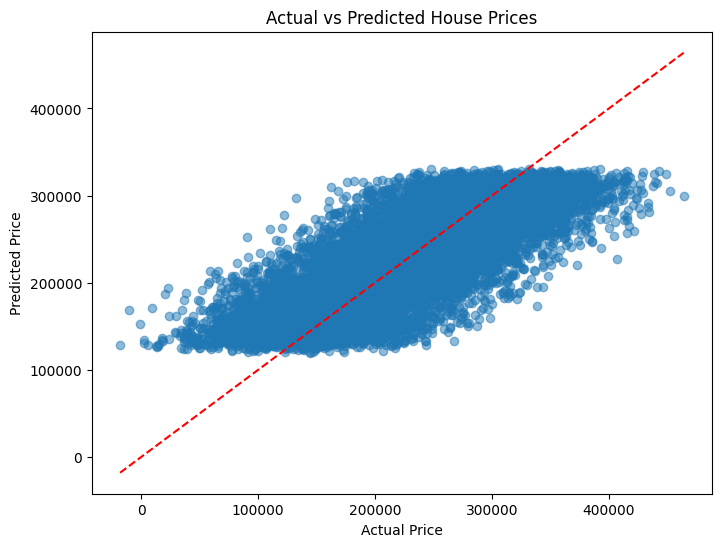

In [ ]:
# Visualize predictions vs actual
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
